### KNN (K-Nearest-Neighbors) Classification

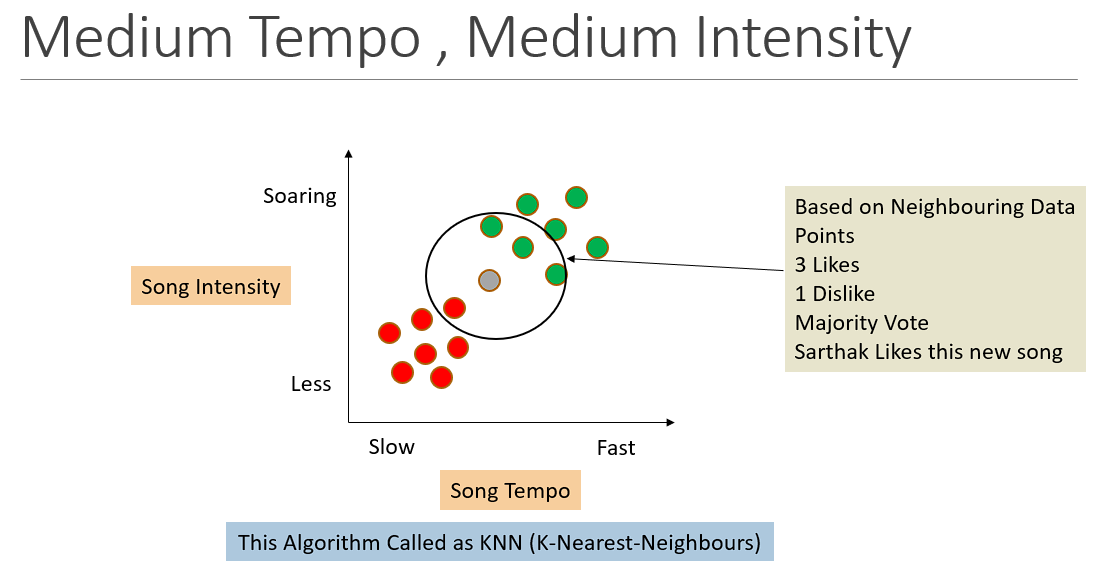

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

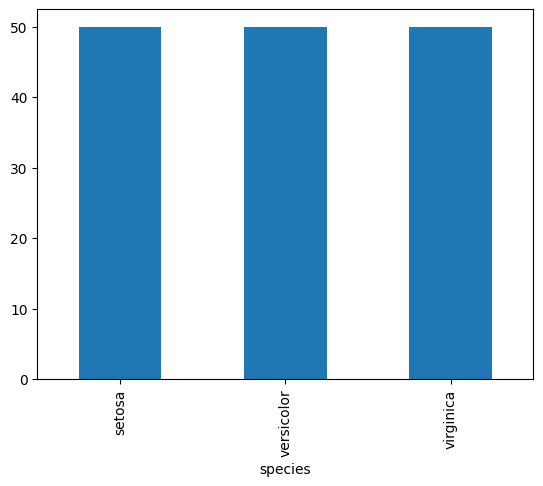

In [8]:
df['species'].value_counts().plot(kind='bar')

### Seperate X and t (species)

In [9]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Preprocessing of X

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Apply train test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest, = train_test_split(X_pre,Y,test_size=0.33,random_state=42)

In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [17]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [18]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [19]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### Create a KNN model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=40)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=40)

In [21]:
model.score(xtrain,ytrain)

0.87

In [22]:
model.score(xtest,ytest)

0.86

#### Hyperparameter tuning


In [23]:
params = {'n_neighbors':[3,4,5,6,7,8,9,10,11]}

In [24]:
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
rscv = RandomizedSearchCV(knn, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10,
                                                        11]},
                   scoring='f1_macro')

In [25]:
rscv.best_score_

0.9319552669552669

In [26]:
rscv.best_params_

{'n_neighbors': 3}

In [27]:
best_knn = rscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

### Evaluate model on train and test

In [28]:
ypred_tr = best_knn.predict(xtrain)
ypred_ts = best_knn.predict(xtest)

In [29]:
ypred_tr[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [30]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [31]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [32]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### Plot the confusion matrix

In [33]:
best_knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

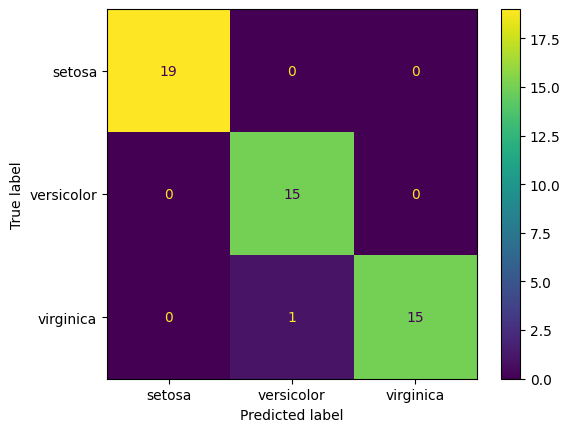

In [34]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_knn.classes_)
cfd.plot()

### Classification report

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Above model has good f1_macro score of 0.98 hence i can use this model for out of sample predictions

### Predicting out of sample data

In [36]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [37]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

### pre.transform

In [38]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


### Get the predictions along with probability

In [39]:
preds = best_knn.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [40]:
probs = best_knn.predict_proba(xnew_pre)
probs

array([[0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333]])

In [41]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.66666667])

## Save above in xnew

In [42]:
xnew['species_pred'] = preds
xnew['prob'] = max_probs

In [43]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,1.000000
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,1.000000
3,4.4,2.9,NaN,0.2,setosa,1.000000
4,5.9,3.0,5.1,1.8,virginica,0.666667
5,5.5,3.5,1.3,0.2,setosa,1.000000
6,5.6,NaN,3.6,1.3,versicolor,1.000000
7,6.5,3.0,5.2,2.0,virginica,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.000000
9,5.1,3.4,1.5,NaN,setosa,1.000000


## Save above file to results.csv


In [44]:
xnew.to_csv('KNNResults.csv', index=False)